In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Code for Answer 2)

In [2]:
df = fetch_california_housing(as_frame=True)
X = df.data
y = df.target

In [3]:
df=df.frame

In [4]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [5]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [6]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [7]:
pca = PCA(n_components=2)
df1 = pca.fit_transform(df)
df_pca = StandardScaler().fit_transform(df1)
print(df_pca)

[[-0.97445483  0.71253876]
 [ 0.86144983 -0.38618073]
 [-0.82083733  1.66305725]
 ...
 [-0.36950049 -1.07168622]
 [-0.60439301 -1.0623185 ]
 [-0.03394103 -1.0519631 ]]


In [8]:
df_pca

array([[-0.97445483,  0.71253876],
       [ 0.86144983, -0.38618073],
       [-0.82083733,  1.66305725],
       ...,
       [-0.36950049, -1.07168622],
       [-0.60439301, -1.0623185 ],
       [-0.03394103, -1.0519631 ]])

In [9]:
df = pd.DataFrame(data=df_pca, columns = ['PC1', 'PC2'])

In [10]:
df

,PC1,PC2
0,-0.974455,0.712539
1,0.861450,-0.386181
2,-0.820837,1.663057
3,-0.766088,1.687577
4,-0.759907,1.687356
...,...,...
20635,-0.512577,-0.453368
20636,-0.944364,-1.158502
20637,-0.369500,-1.071686
20638,-0.604393,-1.062318


In [11]:
data=df.to_numpy()

### Code for Answer 1)

In [12]:
import numpy as np
from scipy.stats import multivariate_normal

def expectation_step(X, pi, mu, cov):
    N, D = X.shape
    K = len(pi)
    resp = np.zeros((N, K))

    for k in range(K):
        resp[:, k] = pi[k] * multivariate_normal.pdf(X, mean=mu[k], cov=cov[k], allow_singular=True)

    # Normalize the responsibilities
    resp_sum = np.sum(resp, axis=1)
    for k in range(K):
        resp[:, k] /= resp_sum

    return resp

def maximization_step(X, resp):
    N, D = X.shape
    K = resp.shape[1]

    # Update pi
    pi = np.sum(resp, axis=0) / N

    # Update mu
    mu = np.zeros((K, D))
    for k in range(K):
        mu[k] = np.sum(resp[:, k].reshape(-1, 1) * X, axis=0) / np.sum(resp[:, k])

    # Update covariance
    cov = np.zeros((K, D, D))
    for k in range(K):
        diff = X - mu[k]
        cov[k] = np.dot(resp[:, k] * diff.T, diff) / np.sum(resp[:, k])

    return pi, mu, cov

def EM(X, K, max_iter=100):
    N, D = X.shape

    # Initialize the parameters
    pi = np.ones(K) / K
    np.random.seed(2000)
    mu = np.random.randn(K, D)
    cov = np.array([np.eye(D) for _ in range(K)])

    # Run EM algorithm
    for i in range(max_iter):
        resp = expectation_step(X, pi, mu, cov)
        pi, mu, cov = maximization_step(X, resp)

    return pi, mu, cov

### Code for Answer 3 and 4)

In [13]:
def prediction(data, K, N, means, covariances, mixing_coefficients):
    predicted_k = np.zeros(N, dtype=int)
    for n in range(N):
        probabilities = np.zeros(K)
        for k in range(K):
            probabilities[k] = mixing_coefficients[k]*multivariate_normal.pdf(data.iloc[n,:], list(means[k]),list(covariances[k]),allow_singular=True)
        predicted_k[n] = int(np.argmax(probabilities))
    return predicted_k


K = 2

Pi values: [0.16138386 0.83861614]

Mean values:
 [[ 1.3509222  -0.32226596]
 [-0.25997239  0.06201708]]

Co-variance matrix:
 [[[ 2.86213956  0.63154218]
  [ 0.63154218  0.91148599]]

 [[ 0.22286048 -0.02163143]
  [-0.02163143  0.99320158]]]

Silhouette score: 0.4554871950955181


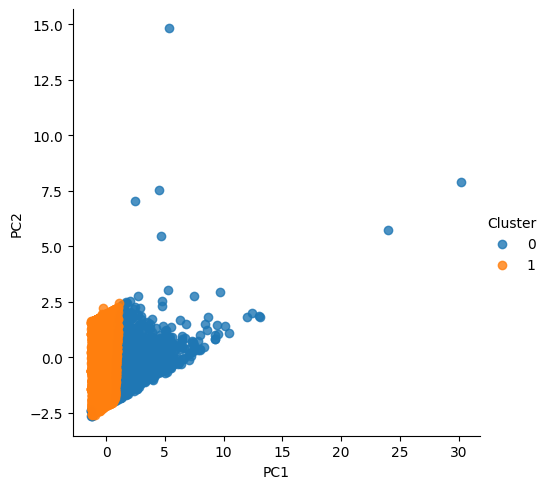


....................................................................................................................................................

K = 3

Pi values: [0.11497093 0.29915599 0.58587308]

Mean values:
 [[ 2.00396977 -0.17597533  0.        ]
 [-0.50319631  0.87136401  1.        ]
 [-0.13631635 -0.41039899  1.        ]]

Co-variance matrix:
 [[[2.47464119 0.50705537 0.        ]
  [0.50705537 0.89460438 0.        ]
  [0.         0.         0.        ]]

 [[0.09477515 0.02780105 0.        ]
  [0.02780105 0.40947693 0.        ]
  [0.         0.         0.        ]]

 [[0.23689338 0.12344802 0.        ]
  [0.12344802 0.76001087 0.        ]
  [0.         0.         0.        ]]]

Silhouette score: 0.3401997298509445


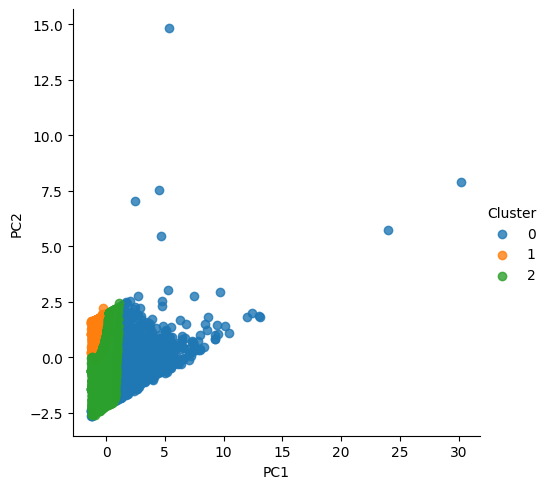


....................................................................................................................................................

K = 4

Pi values: [0.03091761 0.08405332 0.5753876  0.30964147]

Mean values:
 [[ 3.59131129  0.04379184  0.        ]
 [ 1.42009266 -0.25681302  0.        ]
 [-0.11428662 -0.47465535  2.        ]
 [-0.53170902  0.94736292  1.        ]]

Co-variance matrix:
 [[[5.26915389 1.27086297 0.        ]
  [1.27086297 1.46516748 0.        ]
  [0.         0.         0.        ]]

 [[0.17900147 0.0505852  0.        ]
  [0.0505852  0.66043207 0.        ]
  [0.         0.         0.        ]]

 [[0.23308307 0.16256936 0.        ]
  [0.16256936 0.67871904 0.        ]
  [0.         0.         0.        ]]

 [[0.07947389 0.04349391 0.        ]
  [0.04349391 0.30849872 0.        ]
  [0.         0.         0.        ]]]

Silhouette score: 0.4653915740370577


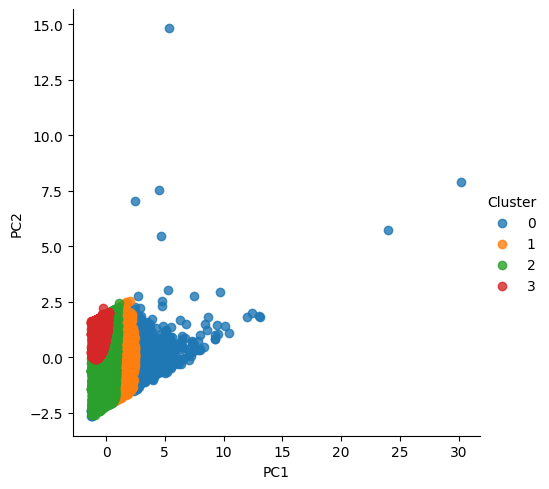


....................................................................................................................................................


In [14]:
for i in range(2,5):
  df_pca=df
  pi, mu, sigma = EM(df_pca,K=i,max_iter = 300)
  print("\nK =", i)
  print("\nPi values:",pi)
  print("\nMean values:\n",mu)
  print("\nCo-variance matrix:\n",sigma)
  df_pred=prediction(df_pca, i, df_pca.shape[0], mu, sigma, pi)
  silhouette=silhouette_score(df_pca, df_pred)
  print('\nSilhouette score:', silhouette)
  df_pca['Cluster']=df_pred
  sns.lmplot(data=df_pca, x='PC1', y='PC2' ,hue='Cluster',fit_reg=False, legend=True, legend_out=True)
  plt.show()
  print("\n....................................................................................................................................................")
